# Modern Data Science 
**(Module 02: Data Visualization)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---


# Session K - Subplots

In our previous lesson, we used a scatterplot to look at pairs of features from the data set in an effort to determine which pair would be best for predicting a flower's species. At the time, we didn't know how to show more than one plot in a single figure, so it was tough to compare the different feature pairings to find the best predictor, but in this lesson we'll see how to display multiple plots in a single figure using the `subplot` function. 

But, before we can learn anything about subplotting, we need to setup our notebook and pull in a data set, so let's go ahead and do that now.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/style/core.py:203: UserWarning: In /home/dsxuser/.config/matplotlib/stylelib/my_custom_style.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)


## Getting the Data

Once again, we'll be using the [Iris data set][1] from the [UCI Machine Learning Repository][2] to play around with matplotlib's subplotting features. The code below was taken from the earlier lessons and will download and load the data set into a variable called `data`.

[1]: https://archive.ics.uci.edu/ml/datasets/Iris
[2]: http://archive.ics.uci.edu/ml/

In [2]:
import csv
import urllib
from collections import namedtuple

# Create a namedtuple constructor for each record in the Iris data
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
#    5. class: 
#       -- Iris-setosa
#       -- Iris-versicolour
#       -- Iris-virginica
fields = ('sepal_length', 
          'sepal_width', 
          'petal_length', 
          'petal_width', 
          'species')
IrisRecord = namedtuple('IrisRecord', fields)

# Download and read in the data from the UCI Machine Learning Repository
response = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
iris_data_csv = str(response.read().strip(), encoding = 'utf-8')

# Convert each record into a format that's easier to work with (i.e.,
# wrap each record in the namedtuple that we created).
data = []
for row in csv.reader(iris_data_csv.splitlines()):
    data.append(IrisRecord(
        sepal_length          = float(row[0]),
        sepal_width           = float(row[1]),
        petal_length          = float(row[2]),
        petal_width           = float(row[3]),
        species               = row[4]))

## Creating the `scatter` Function

Now, we could copy and paste the code we used for drawing our scatterplots for each plot we want to make, but that's a bit tedious and error prone. So, for this lesson, we'll grab the code from the 'More Plotting' lesson, and wrap it in a function that will allow us to create scatterplots for different pairs of features with just a single line of code.

The code below creates a function called `scatter` that takes a 2D matrix of data and several keyword variables that allow us to describe which data we wish to plot as well as some of the aesthetic attributes of the plot such as `x` and `y` labels and legend location.

In [3]:
from itertools import cycle
from collections import defaultdict

def scatter(m, x=None, y=None, target=None, x_label=None, y_label=None, loc='upper right'):
    """Takes a 2D matrix and keys for getting the x and y values
    
    The x, y, and target parameters are either getter functions 
    that will be used to extract their corresponding values from
    each row, or they are strings which will be used with the
    getattr function to extract the value. If None, it is assumed
    that the x and y values are the first and second in the row
    and the target value is the last value in the row.
    """        
    # Create a color map of species names to colors
    color_cycler = cycle(plt.rcParams['axes.prop_cycle'])
    cmap = defaultdict(lambda: next(color_cycler)['color'])
    
    # Create the x, y, and target values getter functions,
    # and create human readable x and y labels if none 
    # were passed in.
    if x is None:
        x_getter = lambda r: r[0]
    elif isinstance(x, basestring):
        if x_label is None:
            x_label = x.replace('_', ' ').title()
        x_getter = lambda r: getattr(r, x) 
    else:
        x_getter = x
        
    if y is None:
        y_getter = lambda r: r[1]
    elif isinstance(y, basestring):
        if y_label is None:
            y_label = y.replace('_', ' ').title()
        y_getter = lambda r: getattr(r, y) 
    else:
        y_getter = y
        
    if target is None:
        target_getter = lambda r: r[-1]
    elif isinstance(target, basestring):
        target_getter = lambda r: getattr(r, target)
    else:
        target_getter = target
    
    # Extract the x and y values (i.e., sepal length and width)
    # from the data set. Also, create a list of corresponding
    # colors based on the species of each record.
    _x, _y, colors = [], [], []
    for r in data:
        _x.append(x_getter(r))
        _y.append(y_getter(r))
        colors.append(cmap[target_getter(r)])

    # Plot the data on a scatter plot. Each point will have an outline 
    # color according to their species, but we'll leave the centers 
    # colorless (for aesthetic purposes only). Finally, we'll reduce
    # the line width of each data point (again for aesthetics only).
    plt.scatter(_x, _y, edgecolors=colors, c='none', linewidths=0.5)

    # Add x and y labels
    if x_label is not None:
        plt.xlabel(x_label)
    if y_label is not None:
        plt.ylabel(y_label)
    
    # Get the list of classes for the target variable
    classes = list(set(r[-1] for r in m))

    # Create a few "proxy artists" for creating the legend. Calling the 
    # legend() function without passing in any parameters will create a
    # legend for any labeled data in the graph, so we could do something
    # funky where we add a label for one line per species, but that 
    # doesn't seem as simple and clean as just creating a few lines that
    # we use just to create the legend. Plus, this is an officially 
    # sanctioned way to create a legend (just see the legend docs).
    legend_handles = [plt.Line2D([], [], color=cmap[cls], label=cls) for cls in classes]
    plt.legend(handles=legend_handles, loc=loc);

## Drawing Multiple Plots With `subplot`

The `subplot` function can be used to create a single plot in a grid of subplots. It takes three integer values: the first two describe the shape of the grid and the third is the index of the subplot you want to create. So, for example, if we wanted to create a pair of subplots, one beside the other horizontally, we would call the `subplot` function with the first number set to 1, to signify that our grid will have 1 row, and the second number set to 2, to signify that our grid will contain 2 columns. Our grid would then contain 2 sublots, numbered 1 and 2, since the `subplot` function assumes that subplots are indexed starting at 1.

Let's try creating that horizontal grid of subplots now. 

The very first thing we'll do is adjust the width of our figure slightly, otherwise, we'll end up with two very narrow subplots since the default width is only appropriate for a single plot. On line 2, you can see the code makes a call to the `pyplot.gcf` function to get the current `Figure` object, and then it calls the `Figure.set_figwidth` function to adjust the width of the figure. Next, on line 5, we'll call the `subplot` function to create the first plot in the grid. This call will create an instance of the `Axes` class and set it as the current axes object on the current figure. Then, we'll call the `scatter` function we created above, pass in our data, and specify the sepal length and width as the features we want to show in our first plot.

To plot the second scatterplot, you simply call the `subplot` function again with the same number of rows and columns, but this time with the index value of the next plot in the grid, that would be the number 2 in this case. Notice, in this call, however, that we are passing in the single value `122` rather than three separate integer values. This is a shorthand that the `subplot` function allows if you have a grid that has less than 10 subplots in it. Finally, on the last line, we call our `scatter` function again, this time with the petal dimensions and a different location for the legend so as to not obscure the data in the graph.

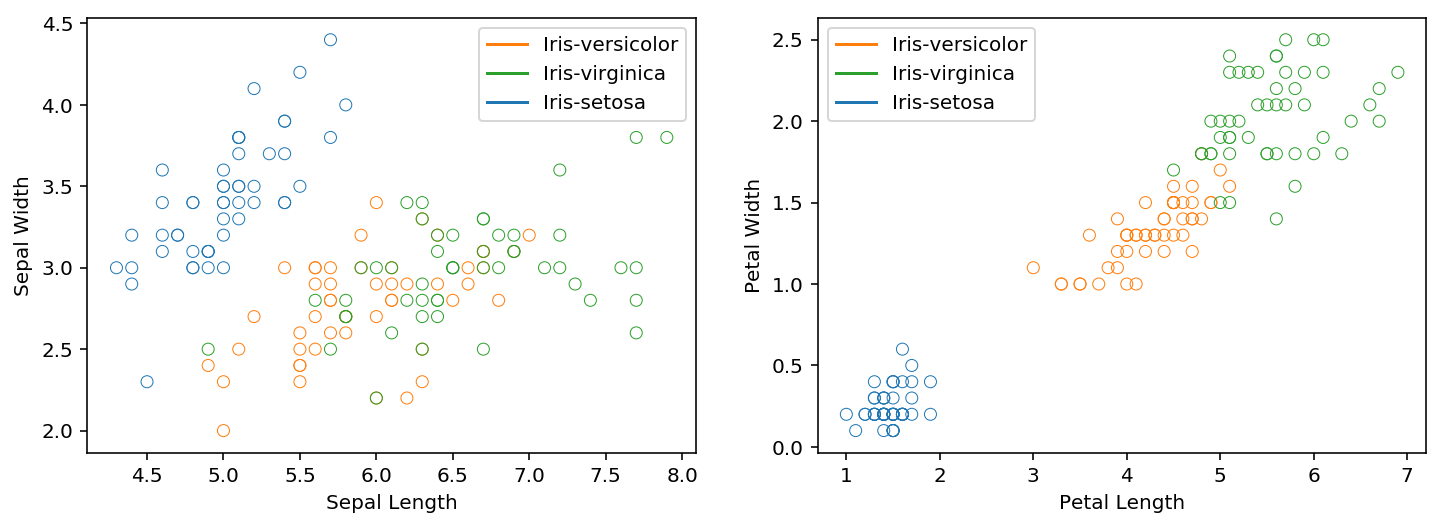

In [7]:
basestring = (str,bytes)
# Adjust the width to fit two plots side-by-side
plt.gcf().set_figwidth(12)

# Create the first plot in a 1x2 grid
plt.subplot(1, 2, 1)
scatter(data, 'sepal_length', 'sepal_width')

# Create the second plot in a 1x2 grid.
# For grids that have less than 10 subplots, you can use
# the shorthand below where you leave out the commas between
# the number of rows, number of columns, and index values.
plt.subplot(122)
scatter(data, 'petal_length', 'petal_width', loc='upper left')

Looks pretty nice, right? And, viewing the data side-by-side like this makes it so much easier to see the magnitude of the effect that different feature pairs have on the clustering of our data. 

Let's switch it up a little bit though, and do the same thing vertically. The code below displays the same set of scatterplots, but this time, we'll display them in a single column instead of a single row. We'll also use the `subplots` function this time to create the entire grid of `Axes` objects ahead of time. 

The important lines in this code are lines 5, 13, and 17. First, take a look at line 5. As I mentioned, this time around we're calling the `subplots` function instead of the singular `subplot` function. The difference is that `subplot` creates only a single `Axes` object when it's called, so you build up your grid one `Axes` object at a time. The `subplots` function, on the other hand, creates the entire grid of `Axes` objects at once and returns them, along with the current `Figure`, in a tuple. On line 5, we call the `subplots` function to create a 2 row by 1 column grid, and we capture the `Axes` objects returned in the variables `ax1` and `ax2`.

On lines 13 and 17, we see next bit of code that differs from the previous example. Since we're no longer creating each subplot as we need them, we'll need to set the current subplot, or axes, before we can draw each scatterplot. To do so, we have to call the set current axes function, `plt.sca`, and pass in the `Axes` object that we want to plot our data on. Once we've set the current axes, we can call our `scatter` function and it will draw the scatterplot using the `Axes` object we just set as the current axes.

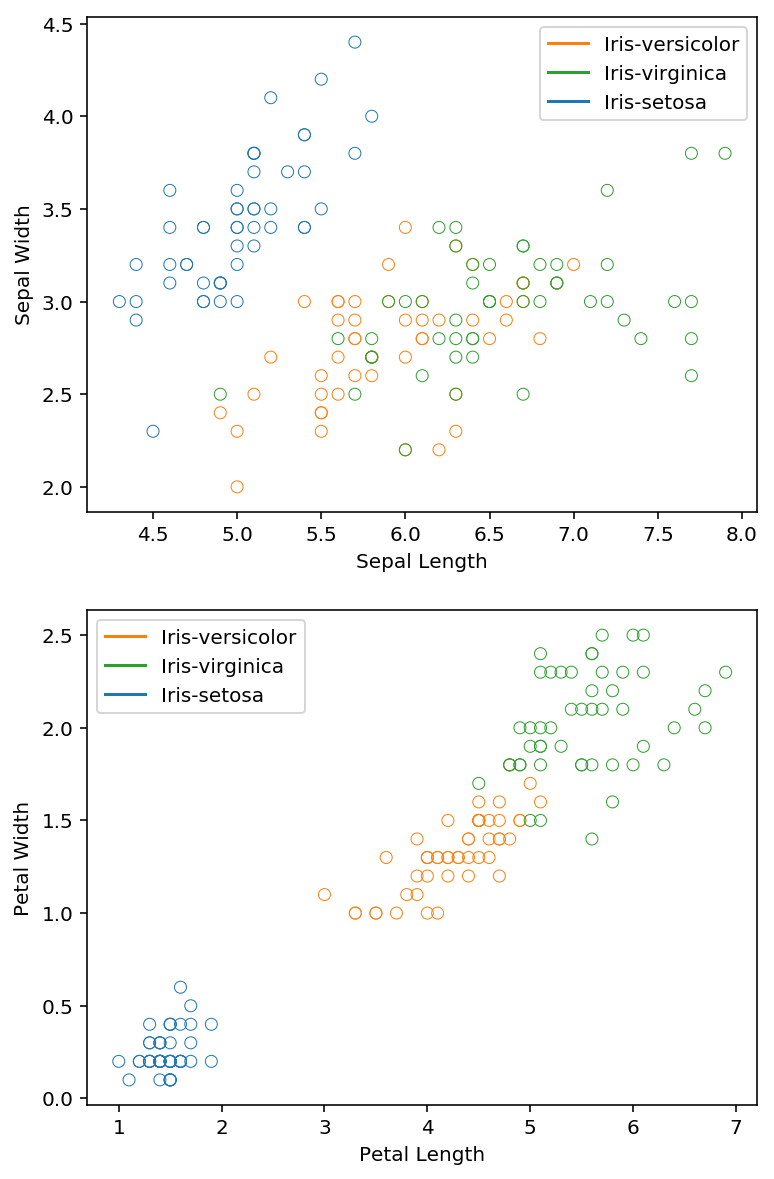

In [8]:
# The difference between the subplot and subplots
# functions is that the former creates a single 
# axes object every time it's called, whereas the
# the latter creates all of the axes objects at once.
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)

# Since we created all of the xes objects ahead of time, 
# we have to set the current axes ourselves before calling
# the scatter function. Below we set the current axes to 
# the first Axes object before plotting the sepal dimensions.
plt.sca(ax1)
scatter(data, 'sepal_length', 'sepal_width', loc='upper right')

# Plot the petal dimensions in the second axes
plt.sca(ax2)
scatter(data, 'petal_length', 'petal_width', loc='upper left')

One of the things we didn't see though, was how to adjust some of the parameters of the grid, like the spacing between subplots for example. In this lesson, we'll take a quick look at some of the options that you have for adjusting these parameters to make your subplots look as nice and readable as possible.

Let's go ahead and jump right into the code.

## Adjusting Subplots

In the code below we use the `subplots` function to create a 3x2 grid. Let's run it and see how it looks.

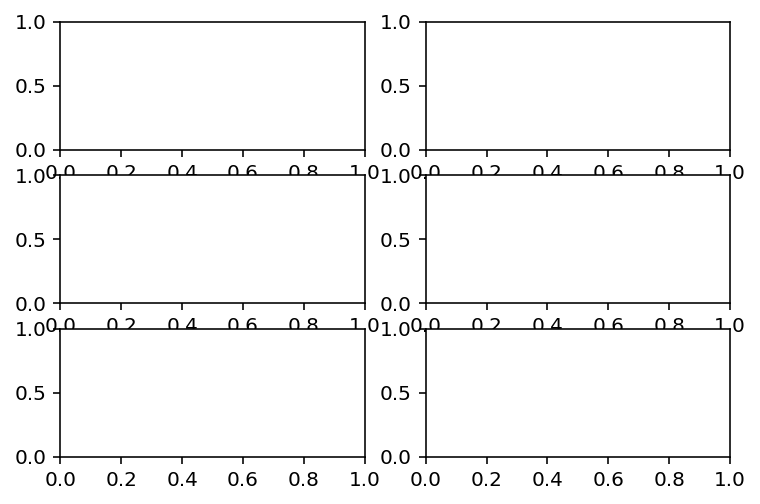

In [9]:
plt.subplots(3, 2);

### Tight Layout

It doesn't look too bad, but the vertical spacing between each subplot is a little tight---notice that there's a little overlap with some of the x-axis labels. If you want to fix that, and make the plots fit together much better, you can simply call the `pyplot.tight_layout` function. The [`tight_layout`][1] function automatically adjusts the parameters of the subplots so that they fit nicely within the figure. 

Let's go ahead and give it a try now to see how well it works.

[1]: http://matplotlib.org/users/tight_layout_guide.html

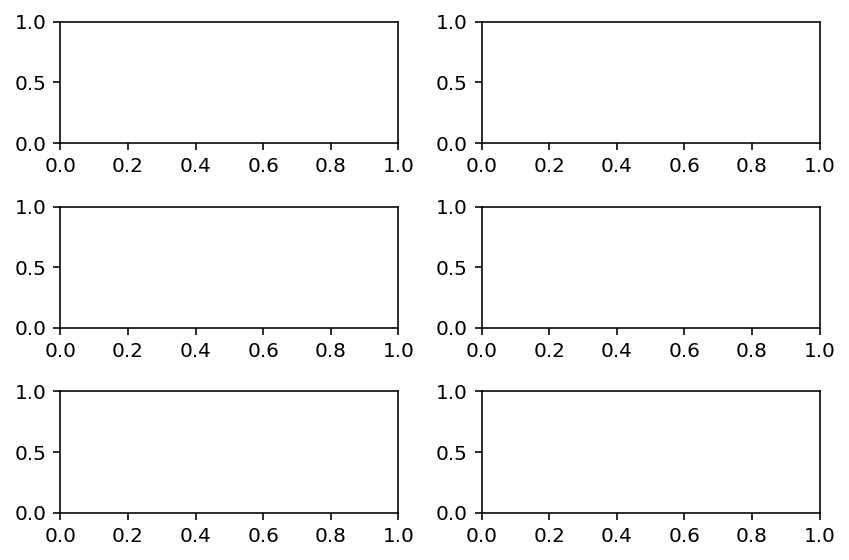

In [10]:
plt.subplots(3, 2)
plt.tight_layout();

### `pyplot.subplots_adjust`

Well, that looks much better! The `tight_layout` function is really nice and should solve most of your problems, but as of now, it's still an experimental feature and not guaranteed to work. If you do run into problems with it, you can fall back on the `pyplot.subplots_adjust` function to change some, or all, of the attributes of the grid. 

The example below uses this function to adjust the vertical spacing, or hspace for height, between each plot.

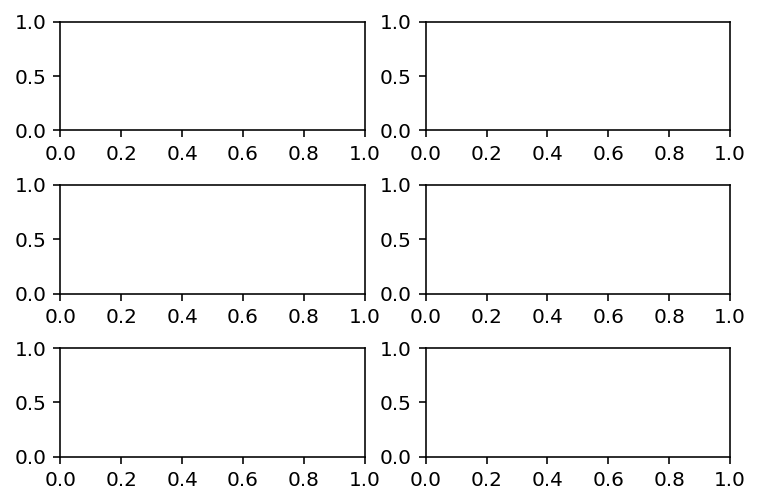

In [11]:
plt.subplots(3, 2)
plt.subplots_adjust(hspace=0.5);

Not quite as easy as calling the `tight_layout` function, but not exactly rocket science either.  

We just saw how to use the `tight_layout` and `subplots_adjust` functions to make minor tweaks to our grids that can help make our plots easier to read and comprehend. In the next lesson, we'll see how to use the subplotting features that we've learned in the last few lessons to create a very powerful visualization technique called a scatterplot matrix. Following that, we'll see how to create grids of subplots of varying shapes and sizes.

## `Subplot2Grid`

The `subplot` function is easy to understand and use, and as long as the dimensions of the subplots in your grid are exactly the same, you'll never need anything else. However, the moment you need to adjust one or two subplots to be a slightly different height or width from the rest, you'll need something a bit more powerful.

In this lesson, we'll see how the `subplot2grid` function can provide us with the extra power that we'll need to create much more complex grid layouts than we've seen thus far.

### The `subplot2grid` Function

<!---
We've already seen that we can call the `subplot` function with a set of integers, where the first two describe the shape of the grid and, the third specifies the index of the grid cell we want to create subplot in. This is easy to use and does the job in most cases, but when you need to create a subplot that spans multiple cells, you'll need to use the `subplot2grid` function.
--->

You can think of the `subplot2grid` function as a superset of the `subplot` function. In other words, anything that you can do with the `subplot` function, you can do with the `subplot2grid` function. In that sense, you could actually just use the `subplot2grid` function for all of your plotting needs, and the next bit of code proves it.

In the code below we use the `subplot` function to create a simple 2x2 grid of cells and the first 2 subplots in that grid.

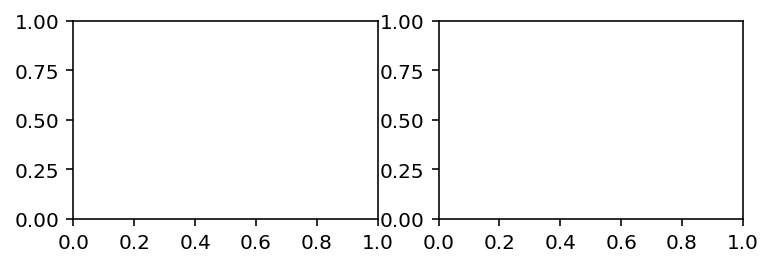

In [12]:
# Create a 2x2 grid of cells and use the subplot function
# to create the subplots in the first row.
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)

Then, we use the `subplot2grid` function to do the exact same thing as above for the bottom row. Though a bit more verbose, the `subplot2grid` function's interface is still relatively simple, and the end result is the same as calling the `subplot` function. 

Notice that the `subplot2grid` function calls below take two tuples: the first holds the dimensions of the grid, and the second contains the row and column coordinates of a cell in that grid. 

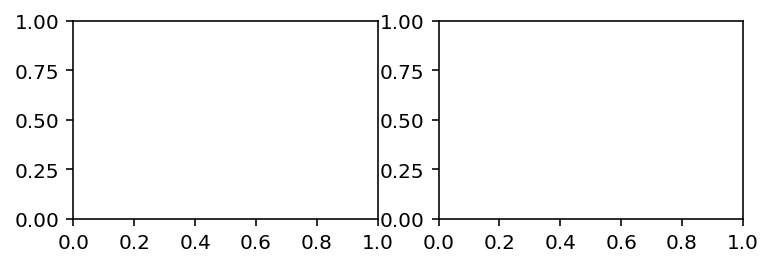

In [13]:
# Use the subplot2grid function to create the subplots in
# the bottom row.
ax3 = plt.subplot2grid((2, 2), (1, 0))
ax4 = plt.subplot2grid((2, 2), (1, 1))

To make our plots a bit easier to read, we'll take each of the `Axes` objects created by the `subplot` and `subplot2grid` functions above, and use them to write a bit of text to each subplot's center that just displays the subplot's coordinates in a `(row, column)` format.

In [14]:
# Add row and column coordinates to each of the plots in the grid
ax1.text(0.5, 0.5, "(0, 0)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax2.text(0.5, 0.5, "(0, 1)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax3.text(0.5, 0.5, "(1, 0)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax4.text(0.5, 0.5, "(1, 1)", horizontalalignment='center', verticalalignment='center', fontsize=20);

Finally, we call the `tight_layout` function to correctly space all of the subplots in our grid before showing it.

In [15]:
# The tight_layout function works no matter how you create
# the subplots in your figure.
plt.tight_layout()
plt.show()

As we've just seen, calling the `subplot2grid` function with just two tuples produces results that are identical to calling the `subplot` function. Where it differs, though, is that you can pass in a pair of optional parameters, the `rowspan` and `colspan` parameters, to make a  subplot stretch across multiple cells in a grid. 

The example below, shows you how to use these optional parameters to create a relatively complex 3x2 grid layout. For this example, we use just the `subplot2grid` function to create our more complex layout.

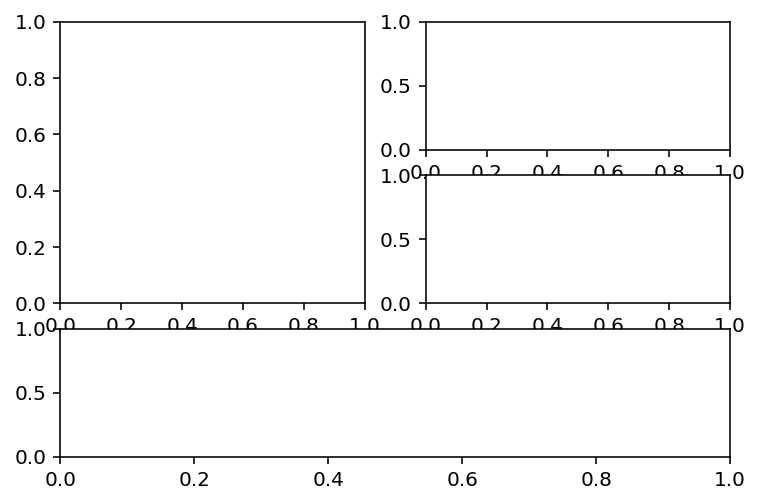

In [16]:
# Create a 3x2 grid with four cells, where one spans across
# multiple rows, and another spans multiple columns.
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 2), (0, 1))
ax3 = plt.subplot2grid((3, 2), (1, 1))
ax4 = plt.subplot2grid((3, 2), (2, 0), colspan=2)

On lines 4 and 5 in the code above, we created two normal subplots, i.e., plots that span only a single cell. Lines 3 and 6, however, are a bit more interesting. Line 3 creates the very first subplot in our grid. This subplot begins in very first cell, i.e., at the intersection of the first row and column, and it uses the `rowspan` parameter to specify that it spans across the first two rows in our grid. Line 6 does something similar, but it uses the `colspan` parameter to force its subplot to stretch across both columns in our grid instead. 

The rest of the code below is, more or less, identical to what we saw in our last example and is here just to make it easier to understand what we're doing in the code above.

In [17]:
# Add row and coordinate labels to the ac of the cells in the grid
ax1.text(0.5, 0.5, "(0, 0)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax2.text(0.5, 0.5, "(0, 1)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax3.text(0.5, 0.5, "(1, 1)", horizontalalignment='center', verticalalignment='center', fontsize=20)
ax4.text(0.5, 0.5, "(2, 0)", horizontalalignment='center', verticalalignment='center', fontsize=20)

# Make the cells are properly spaced
plt.tight_layout()
plt.show()

The beauty of this interface, at least for me, is its simplicity. It's just so easy to understand; you simply define the shape of your grid, pass in the row and column where you want your subplot to begin, and then specify its height and width by passing in the number of rows and columns that it will stretch across. Also, if you have any prior experience with creating tables in HTML, which many of you probably do, you're already intimately familiar with the row and column spanning specifics of this interface. 



## Conclusion

We just saw how to use the `subplot` and `subplots` functions to create grids of plots making it infinitely easier for us to compare different feature sets in our data. 

This will also wrap up our look at subplotting in matplotlib. You've seen how to create simple grids of subplots using the matplotlib's `subplot` function. You've also seen how to use the simple `subplot` function to put together a fairly complex visualization function called a scatterplot matrix. And, finally, you've seen how to use the `subplot2grid` function to create much more complex and interesting subplot layouts. With the tools you've learned over the past three lessons, you should be ready to tackle just about any subplotting challenge that your research can throw at you.